# from allcools page: https://lhqing.github.io/ALLCools/cell_level/dmg/01-AddGenemCFractions.html#calculate-gene-mc-fractions
Calculate Gene mC Fractions

In [5]:
import pandas as pd
import pybedtools

from ALLCools.mcds import MCDS
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

In [17]:
gene_meta_path = '../../GeneMetadata_withGeneName_corrected.csv' # this file was created from genes.txt file from rheMac10 gtf files for only genebody. then converted to tsv: sed 's/"//g' genes.txt | tr -s ' ' '\t' > genes.tsv, used bgzip to compressed/index the file
chrom_to_remove = ['chrM', 'chrY', 'chrUn', 'Chromosome', 'NW']

# change this to the path to your filtered metadata
metadata_path = '../../CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv'

# change this to the paths to your MCDS files
mcds_path = '../mcds_genebody/',
obs_dim = 'cell'
var_dim = 'genebody'

min_cov = 5


In [18]:
# load metadata

gene_meta = pd.read_csv(gene_meta_path, index_col='gene_id', sep=',')
gene_meta

,chrom,start,end,gene_name
gene_id,,,,
ENSMMUG00000023296,chr1,8230,26653,NaN
ENSMMUG00000000634,chr1,71581,83178,ZNF692
ENSMMUG00000037875,chr1,81257,91679,ZNF672
ENSMMUG00000000632,chr1,102661,117835,SH3BP5L
ENSMMUG00000064799,chr1,122995,124202,NaN
...,...,...,...,...
ENSMMUG00000052253,chrY,10095285,10099690,NaN
ENSMMUG00000057875,chrY,10102204,10117522,NaN
ENSMMUG00000063386,chrY,10327102,10371239,NaN


In [19]:

metadata = pd.read_csv(metadata_path, index_col=0, sep='\t')
metadata = metadata[metadata["Type"] == "PO"]
total_cells = metadata.shape[0]
print(f'Metadata of {total_cells} cells')
metadata

Metadata of 46 cells


,SampleI,AnimalID,Date,Animdate,Collection,Year,Type.of.sample,WellID,WellBarcode,Type,TotalRead,mCGFrac,Group,SampleName,Path,Bamfile,Total.Reads,Mitochondrial.Reads,MT.Fraction,MT.Percentage
SampleID,,,,,,,,,,,,,,,,,,,,
4146045001PO3NC4G4C,4146045001PO3NC4G4,41460,45001,f2,2,2023,Pooled Oocytes (4) #3,G4,TCGTGCAT,PO,2200000,0.689,Control,4146045001PO3NC4G4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41460_45001_PO3_NC4_G4_1_val_1_bismark_bt2_pe....,2535512,8738,NaN,NaN
4129944963PO2NC4M1S,4129944963PO2NC4M1,41299,44963,d2,1,2023,Pooled Oocytes (4) #2,M1,CACGCAAT,PO,2300000,0.684,Stressed,4129944963PO2NC4M1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41299_44963_PO2_NC4_M1_1_val_1_bismark_bt2_pe....,2270808,38790,NaN,NaN
4520844650PO1NC5A7S,4520844650PO1NC5A7,45208,44650,n1,1,2022,Pooled Oocytes (5) #1,A7,ATCGTCTC,PO,2400000,0.676,Stressed,4520844650PO1NC5A7S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,45208_44650_PO1_NC5_A7_1_val_1_bismark_bt2_pe....,2821858,11608,NaN,NaN
4146045001PO2NC3F4C,4146045001PO2NC3F4,41460,45001,f2,2,2023,Pooled Oocytes (3) #2,F4,CTGAACGT,PO,2500000,0.686,Control,4146045001PO2NC3F4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41460_45001_PO2_NC3_F4_1_val_1_bismark_bt2_pe....,2635056,48304,NaN,NaN
4520844650PO2NC3B7S,4520844650PO2NC3B7,45208,44650,n1,1,2022,Pooled Oocytes (3) #2,B7,CTCTGGAT,PO,2600000,0.680,Stressed,4520844650PO2NC3B7S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,45208_44650_PO2_NC3_B7_1_val_1_bismark_bt2_pe....,2957798,7806,NaN,NaN
3905345005PO1NC2I1S,3905345005PO1NC2I1,39053,45005,b1,1,2023,Pooled Oocytes (2) #1,I1,TGATAGGC,PO,2700000,0.623,Stressed,3905345005PO1NC2I1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,39053_45005_PO1_NC2_I1_1_val_1_bismark_bt2_pe....,2784702,20544,NaN,NaN
4129944963PO1NC3N1S,4129944963PO1NC3N1,41299,44963,d2,2,2023,Pooled Oocytes (3) #1,N1,ATTCCGCT,PO,2900000,0.626,Stressed,4129944963PO1NC3N1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41299_44963_PO1_NC3_N1_1_val_1_bismark_bt2_pe....,2278410,121886,NaN,NaN
4211144957PO1NC3K4C,4211144957PO1NC3K4,42111,44957,g1,1,2023,Pooled Oocytes (3) #1,K4,ACTGGTGT,PO,3200000,0.674,Control,4211144957PO1NC3K4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,42111_44957_PO1_NC3_K4_1_val_1_bismark_bt2_pe....,3039304,77312,NaN,NaN
4660644938PO2NC3A10C,4660644938PO2NC3A1,46606,44938,r1,1,2023,Pooled Oocytes (3) #2,A10,GATCTTGC,PO,3600000,0.680,Control,4660644938PO2NC3A10C_1_val_1_bismark_bt2_pe.al...,/share/lasallelab/Ensi/project/allcools/allc_P...,46606_44938_PO2_NC3_A10_1_val_1_bismark_bt2_pe...,3742728,50728,NaN,NaN


In [20]:
genes_to_skip = set()

# skip smaller genes mostly covered by a larger gene, e.g., a miRNA within a protein coding gene.
# F=0.9 means > 90% of gene_b is overlapped with gene_a, in this case, we only keep gene_a for DMG test
gene_bed = pybedtools.BedTool.from_dataframe(
    gene_meta.reset_index()[['chrom', 'start', 'end', 'gene_id']])
mapped_bam = gene_bed.map(b=gene_bed, c=4, o='distinct', F=0.9)
for _, (*_, gene_a, gene_b_str) in mapped_bam.to_dataframe().iterrows():
    for gene_b in gene_b_str.split(','):
        if gene_b != gene_a:
            genes_to_skip.add(gene_b)

# remove certain chromosomes
genes_to_skip |= set(gene_meta.index[gene_meta['chrom'].isin(chrom_to_remove)])
use_features = gene_meta.index[~gene_meta.index.isin(genes_to_skip)]
print(f'{use_features.size} features remained')

27088 features remained


Feature genebody mean cov across cells added in MCDS.coords['genebody_cov_mean'].


/tmp/ipykernel_328274/1869077740.py:9: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  use_features &= feature_cov_mean[feature_cov_mean > min_cov].index


27055 features remained


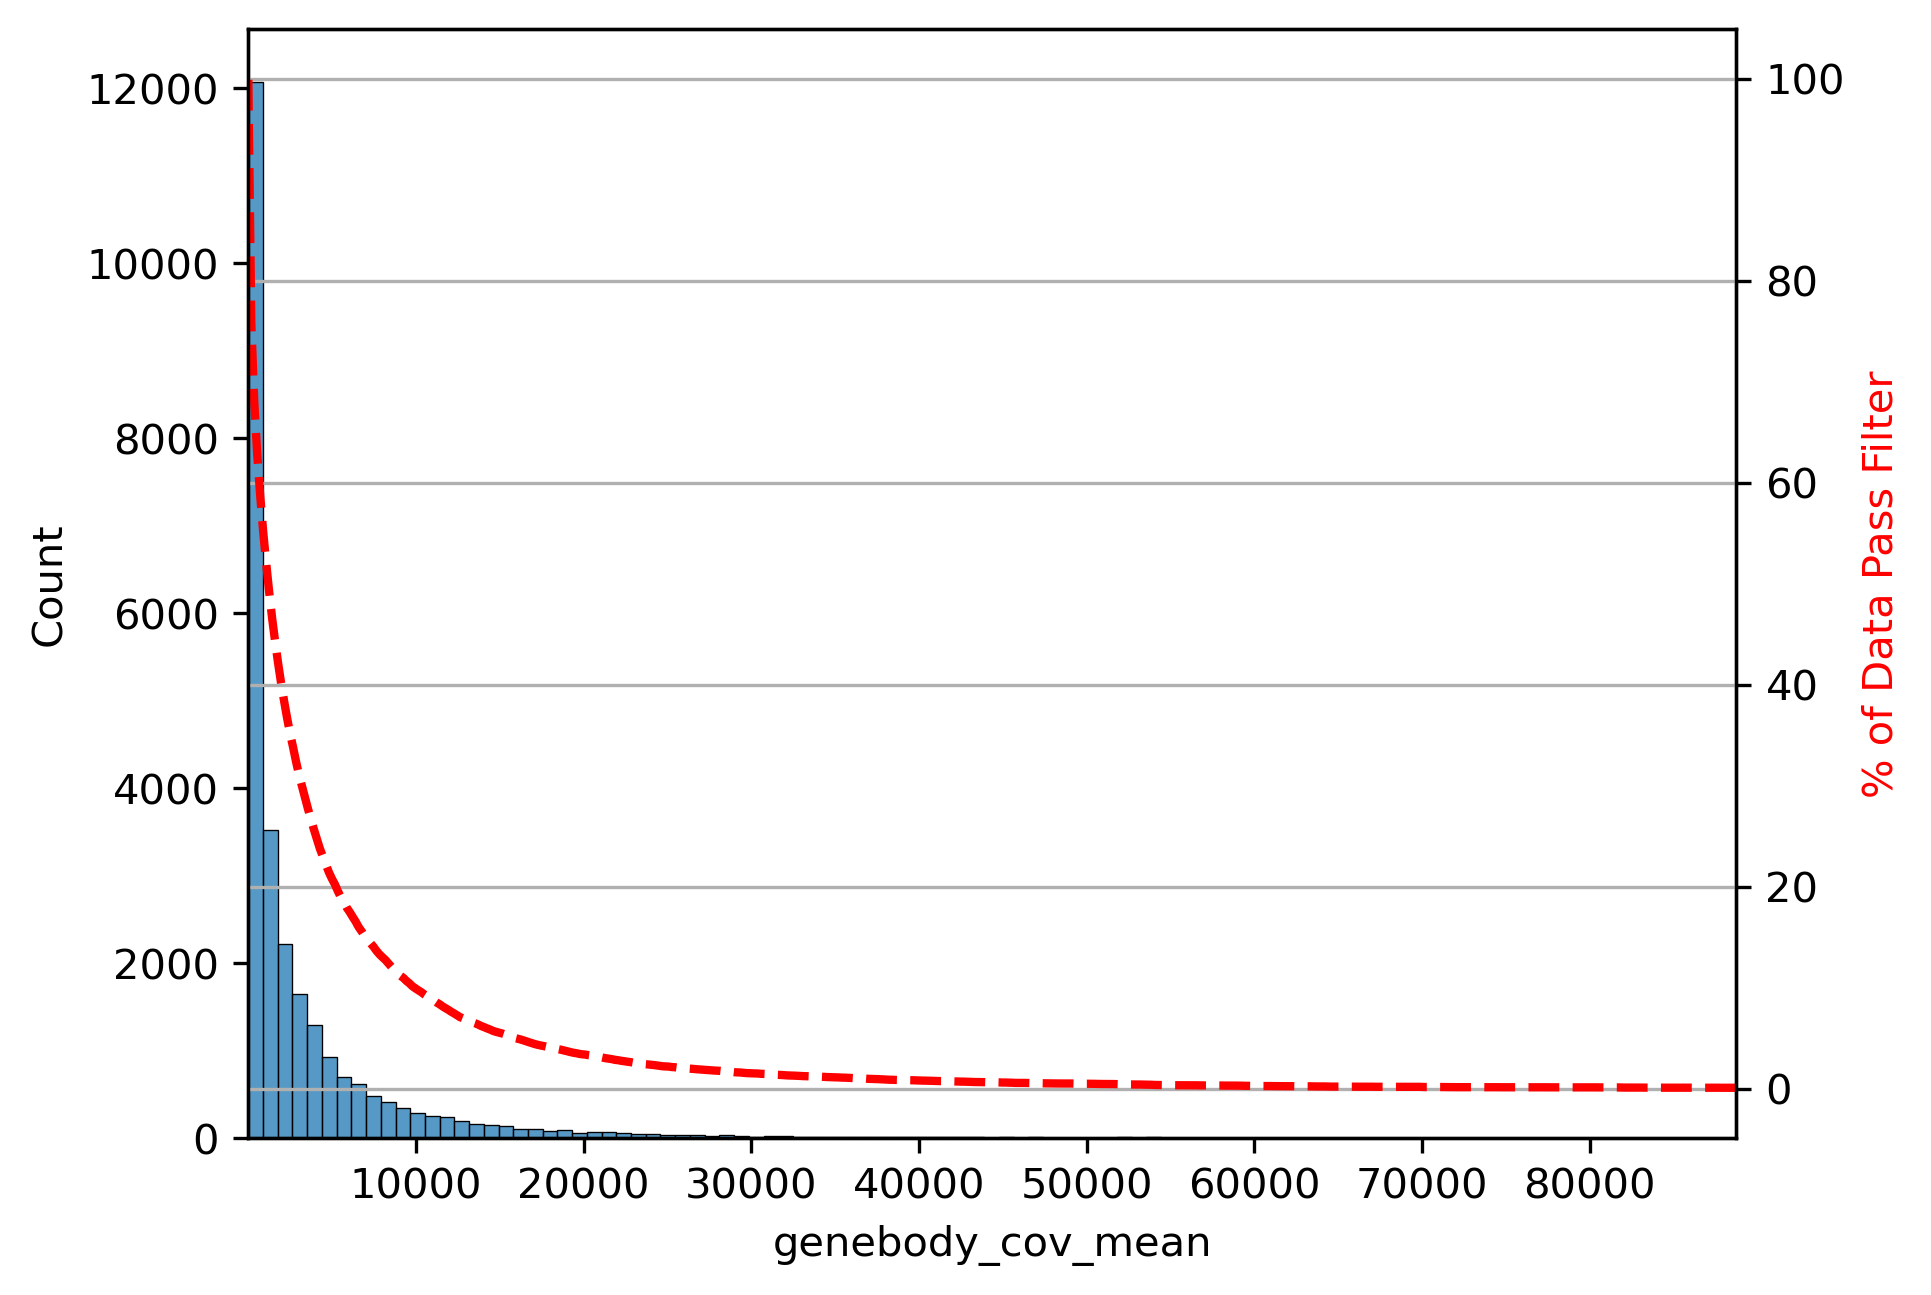

In [22]:
# Filter genes by cell mean coverage¶

mcds = MCDS.open(mcds_path,
                                 var_dim=var_dim,
                                                                           use_obs=metadata.index).sel({var_dim: use_features})
mcds.add_feature_cov_mean()

feature_cov_mean = mcds.coords[f'{var_dim}_cov_mean'].to_pandas()
use_features &= feature_cov_mean[feature_cov_mean > min_cov].index
plt.savefig("panela-3_sf1.pdf")
print(f'{use_features.size} features remained')



In [14]:

mcds.filter_feature_by_cov_mean(min_cov=min_cov)


Before cov mean filter: 26940 genebody
 After cov mean filter: 26928 genebody 100.0%


<xarray.MCDS>
Dimensions:            (cell: 46, count_type: 2, genebody: 26928, mc_type: 2)
Coordinates:
  * cell               (cell) <U20 '4146045001PO3NC4G4C' ... '4123744641PO1NC...
  * count_type         (count_type) <U3 'mc' 'cov'
  * genebody           (genebody) object 'ENSMMUG00000023296' ... 'ENSMMUG000...
    genebody_chrom     (genebody) <U5 'chr1' 'chr1' 'chr1' ... 'chrX' 'chrX'
    genebody_end       (genebody) int64 26653 83178 ... 151987003 152565575
    genebody_start     (genebody) int64 8230 71581 81257 ... 151983199 152564067
  * mc_type            (mc_type) <U3 'CGN' 'CHN'
    genebody_cov_mean  (genebody) float64 964.3 1.281e+03 ... 261.2 69.3
Data variables:
    genebody_da        (cell, genebody, mc_type, count_type) uint32 dask.array<chunksize=(26, 2681, 1, 1), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  genebody

In [15]:
# Calculate and Save Gene mC Fractions

mcds.add_mc_frac(normalize_per_cell=True, clip_norm_value=10)

# only keep fraction for saving
mcds = mcds[['genebody_da_frac']]
mcds['genebody_da_frac'] = mcds['genebody_da_frac'].astype('float32')

mcds.write_dataset('genebody_frac.mcds', var_dims=['genebody'])

use_gene_meta = gene_meta.loc[use_features]
use_gene_meta.to_csv('GeneMetadata.csv.gz')


Saving genebody
Saving chunk 0: 0 - 46


/home/ehabibi/.conda/envs/allcools/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
